# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

### Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1


### Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


### Objective:
    
To Guage Feature Importance

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("credit_data.csv")
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

- There 1000 rows and 21 columns
- conveniently there are no null values
- There are quiet a few object columns that we will have to treat

In [19]:
cat_col = []  # list to hold the categorical features

for i in df.columns:  # Loop to go through each and every column name
    if df[i].dtype == object:  # check if the column is of object type
        cat_col.append(i)  # append the ones that satisfy above condition to the list
        
df.loc[0:3, cat_col]

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes


In [32]:
for i in cat_col:
    print(f'Number of categories in {i} = {len(df[i].unique())}')

Number of categories in account_check_status= 4
Number of categories in credit_history= 5
Number of categories in purpose= 10
Number of categories in savings= 5
Number of categories in present_emp_since= 5
Number of categories in personal_status_sex= 4
Number of categories in other_debtors= 3
Number of categories in property= 4
Number of categories in other_installment_plans= 3
Number of categories in housing= 3
Number of categories in job= 4
Number of categories in telephone= 2
Number of categories in foreign_worker= 2


- The above statements show the cardinality of the individual categorical attributes
- We can either one-hot encode or label encode these attributes
- For the number of rows we have (just 1000 rows) one-hot encoding will make our dataframe too wide 
- Let's go with label encoding for now

In [22]:
from sklearn.preprocessing import LabelEncoder

for i in cat_col:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    
df.head()    

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,1,4,1169,4,0,4,3,...,4,2,67,1,1,2,1,1,1,1
1,1,0,48,3,4,5951,1,2,2,0,...,2,2,22,1,1,1,1,1,0,1
2,0,3,12,1,0,2096,1,3,2,3,...,3,2,49,1,1,1,3,2,0,1
3,0,1,42,3,7,7882,1,3,2,3,...,4,0,45,1,0,1,1,2,0,1
4,1,1,24,2,2,4870,1,2,3,3,...,4,3,53,1,0,2,1,2,0,1


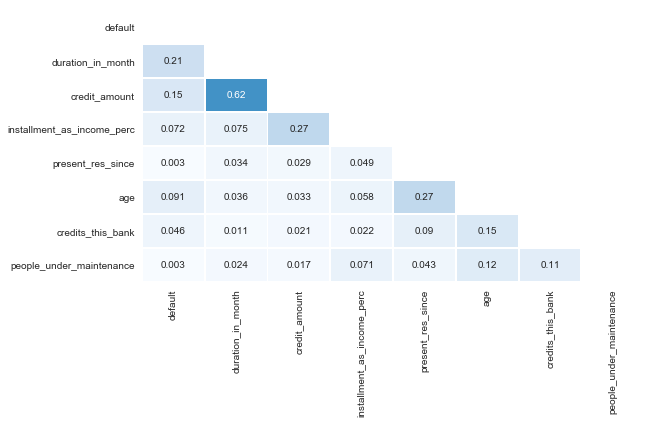

In [38]:
def correlation_plot(df):
    
    corr = abs(df.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

    plt.figure(figsize = (9,5))  # setting the figure size
    sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   # Da Heatmap
    plt.show()
    
correlation_plot(df.drop(columns = cat_col))


- Among the continuous attributes, only one pair - (credit_amount vs duration_in_month) have some significant correlation
- For our current exercise we will ignore it  as the magnitude is also not high - 0.62

In [93]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'default')
y = df.default

X_train, X_test, y_train, y_test = train_test_split (X, y, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 20), (250, 20), (750,), (250,))

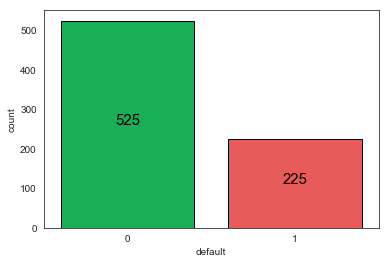

In [94]:
plot = sns.countplot(y_train, edgecolor = 'black', palette = [ '#00C851','#ff4444'])

bars = plot.patches

plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plt.show()

- There are more than twice as number of non-defaulters than defaulters
- We can wither up-sample or down-sample to balance the class imbalance
- Since we already have very less records, let's go with up-sampling of the minority class

In [95]:
extra_samples = y_train[y_train == 1].sample(200, random_state = 1).index   # sample 200 records and store the indices

X_train = pd.concat([X_train, X_train.loc[extra_samples, :]])  # append duplicate records using these indices

y_train = pd.concat([y_train, y_train.loc[extra_samples]])   # append the same duplicate records using the same indices

X_train.shape, y_train.shape

((950, 20), (950,))

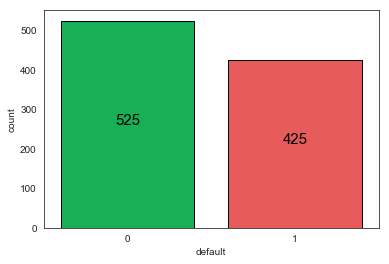

In [96]:
plot = sns.countplot(y_train, edgecolor = 'black', palette = [ '#00C851','#ff4444'])

bars = plot.patches

plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plt.show()

- Now the data looks more balanced

In [97]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score
    
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
   
    return score, recall, precision, specificity, f1_score  # return all the metrics

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, criterion="entropy", random_state = 1)

from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(random_state = 1)

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 1)

from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(random_state = 1)

In [99]:
result = pd.DataFrame(columns = ['score', 'recall', 'precision', 'specificity', 'f1_score'])

for model, model_name in zip([rf, bg, gb, ad], ['Random Forest', 'Bagging', 'Gradient boosting', 'AdaBoosting']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)
    

In [100]:
result

,score,recall,precision,specificity,f1_score
Random Forest,0.756,0.507,0.613,0.863,0.555
Bagging,0.728,0.507,0.551,0.823,0.528
Gradient boosting,0.748,0.653,0.570,0.789,0.609
AdaBoosting,0.736,0.760,0.543,0.726,0.633


In [101]:
importance = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = ['feature_importance'])
importance

,feature_importance
account_check_status,0.090776
duration_in_month,0.102918
credit_history,0.051566
purpose,0.071076
credit_amount,0.136060
savings,0.047788
present_emp_since,0.050684
installment_as_income_perc,0.043864
personal_status_sex,0.036737
other_debtors,0.021046


- The above table shows us how important each of the attributes have been while learning to classify the data
- Let's see what happens if we drop a few variables based on these numbers

In [102]:
unimportant = importance[importance.feature_importance < 0.05].index   # variables with importance less than 0.05
unimportant

Index(['savings', 'installment_as_income_perc', 'personal_status_sex',
       'other_debtors', 'present_res_since', 'property',
       'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [103]:
X_train.drop(columns = unimportant, inplace = True)
X_test.drop(columns = unimportant, inplace = True)

In [104]:
rf = RandomForestClassifier(n_estimators=500, criterion="entropy", random_state = 1)
bg = BaggingClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
ad = AdaBoostClassifier(random_state = 1)

In [105]:
result2 = pd.DataFrame(columns = ['score', 'recall', 'precision', 'specificity', 'f1_score'])

for model, model_name in zip([rf, bg, gb, ad], ['Random Forest', 'Bagging', 'Gradient boosting', 'AdaBoosting']):
    result2.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [106]:
result2

,score,recall,precision,specificity,f1_score
Random Forest,0.756,0.520,0.609,0.857,0.561
Bagging,0.720,0.467,0.538,0.829,0.500
Gradient boosting,0.744,0.653,0.563,0.783,0.605
AdaBoosting,0.732,0.733,0.539,0.731,0.621


- We got almost a similar performance with much lesser number of features
- Random forest gave us the best accuracy overall
- Let's see if we an get a better performance after we tune the model a bit

In [113]:
X_train.columns

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'credit_amount', 'present_emp_since', 'age'],
      dtype='object')

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 500, 1000],
               'max_features': [1,3,5],
               'max_depth': [5, 8, 10, 12]}

rf = RandomForestClassifier(random_state = 1)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train);

grid_search.best_params_

{'max_depth': 12, 'max_features': 1, 'n_estimators': 200}

In [124]:
from sklearn.metrics import confusion_matrix
pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

recall = round(tp/(tp+fn), 3)   
precision = round(tp/(tp+fp), 3)  
specificity =round(tn/(tn+fp),3) 
f1_score =  round(2*precision*recall/(precision + recall), 3)

print(f'Accuracy = {grid_search.score(X_test, y_test)}\nrecall = {recall}\nprecision = {precision}\nspecificity = {specificity}\nf1_score = {f1_score}')

Accuracy = 0.764
recall = 0.547
precision = 0.621
specificity = 0.857
f1_score = 0.582


In [122]:
result.loc['Random Forest']  # first iteration

score          0.756
recall         0.507
precision      0.613
specificity    0.863
f1_score       0.555
Name: Random Forest, dtype: float64

In [123]:
result2.loc['Random Forest']  # second iteration

score          0.756
recall         0.520
precision      0.609
specificity    0.857
f1_score       0.561
Name: Random Forest, dtype: float64

# Conclusion
- All the models have got a 70%+ accuracy
- But have performed poorly on other metrics
- Grid search, gave us slightly better performance over random forest with default parameters